In [32]:
import requests



headersList = {
 "authority": "www.amazon.in",
 "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
 "accept-language": "en-US,en;q=0.9",
 "cookie": "session-id=257-4175849-7884610; i18n-prefs=INR; ubid-acbin=262-4628885-7870554; session-token=K13YE49lm4y8YYcRm7QiVi9PKfreOVMI1rwmf2pncjxQhkkIyi1zgVuXLkOBSUJOz6sgwt6au4i3HRhAw3mfKknuCIAlf204c8MmJGm3tkGO+dXAcEP4RqLFCJFYDykPUazTy7j2ZqzorZcy5BD6mdGByqtx2ZGC6Uk43xSf7822Q4Sb8pHd54fslhaxjohBUkdzOzRy0XuSU+schmrVtj27j4Vf865Xq4uYY1GhvNOXJrXyAZuxp+qbdLJqieM7VhEBvqNZT4z6PGmiCbCcBPHfWHE1iwJofjQh3RwD01Prycoc23mRplndROG8cJ/z7EYZpRqghCMxcPPeCHmApVEDY+1wNdtE; session-id-time=2082787201l; csm-hit=tb:T0XDNTZ4M7CN802ETS7V+sa-FRTNXE8KPZGNTB4ED7EC-82REBDT6MNY9RVB5VR2C|1706628314636&t:1706628314636&adb:adblk_no",
 "device-memory": "8",
 "downlink": "3.35",
 "dpr": "1.25",
 "ect": "4g",
 "rtt": "200",
 "sec-ch-device-memory": "8",
 "sec-ch-dpr": "1.25",
 "sec-ch-ua": 'Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121',
 "sec-ch-ua-mobile": "?0",
 "sec-ch-ua-platform": "Windows",
 "sec-ch-ua-platform-version": "15.0.0",
 "sec-ch-viewport-width": "1536",
 "sec-fetch-dest": "document",
 "sec-fetch-mode": "navigate",
 "sec-fetch-site": "none",
 "sec-fetch-user": "?1",
 "upgrade-insecure-requests": "1",
 "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36",
 "viewport-width": "1536" 
}

payload = ""


In [33]:
responses = []

reqUrl = "https://www.amazon.in/s?k=smartphone&page={page_num}"

for i in range(1,201):
    response = requests.request("GET", reqUrl.format(page_num=i), data=payload,  headers=headersList)
    if response.status_code == 200:
        responses.append(response)
        print(f"Successfully scrapped page {i}")

Successfully scrapped page 1
Successfully scrapped page 2
Successfully scrapped page 3
Successfully scrapped page 4
Successfully scrapped page 5
Successfully scrapped page 6
Successfully scrapped page 7
Successfully scrapped page 8
Successfully scrapped page 9
Successfully scrapped page 10
Successfully scrapped page 11
Successfully scrapped page 12
Successfully scrapped page 13
Successfully scrapped page 14
Successfully scrapped page 15
Successfully scrapped page 16
Successfully scrapped page 17
Successfully scrapped page 18
Successfully scrapped page 19
Successfully scrapped page 20
Successfully scrapped page 21
Successfully scrapped page 22
Successfully scrapped page 23
Successfully scrapped page 24
Successfully scrapped page 25
Successfully scrapped page 26
Successfully scrapped page 27
Successfully scrapped page 28
Successfully scrapped page 29
Successfully scrapped page 30
Successfully scrapped page 31
Successfully scrapped page 32
Successfully scrapped page 33
Successfully scrapp

In [35]:
from os import mkdir

# mkdir("./html")

for index, resp in enumerate(responses,start=1):
    html_path = f"./html/resp_{index}.html"
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(resp.text)

In [36]:
from bs4 import BeautifulSoup
urls = []

for resp in responses:
    soup = BeautifulSoup(resp.text, 'html.parser')
    divs = soup.find_all('div')
    for div in divs:
        code = div.get('data-asin')
        if code is not None and code != "":
            urls.append(f"https://www.amazon.in/gp/aw/d/{code}/")

In [37]:
len(urls)

1292

In [38]:
len(set(urls))

323

In [39]:
with open("urls.txt", "w") as f:
    f.writelines("\n".join(set(urls)))

In [40]:
headersList = {
 "authority": "www.amazon.in",
 "cookie": "session-id=257-4175849-7884610; i18n-prefs=INR; ubid-acbin=262-4628885-7870554; session-id-time=2082787201l; lc-acbin=en_IN; session-token=a2CUqNR1sKz+4RGtV6bCTyMkpUCJXpKNEO/1Bu8xIfuaNHV8X3f0Ypj0EKxR7+y7X07s9x8rOrRNUFYGfXTVoOs4GFMU8TFaK5N/g1+Btb9dfGCg88GnhAKqbubUC2H4U4Pe2cRw+m3zMRLz/tVYxv7aSR8hRrbQAvVS+uNhFbTZNoYju9DyavTSxLX6AZg6hZMemlNl20apeDNJHXulPPmuo39VVMJJ6ARKWYMTwWNvp8LAg8dNVxP2Ca0NXwmtfF/WIkhI30mhCMdd5Pa8hDtUHXx1ukkaNr9/rYV7F/pczux4FmKMKqtWZMZW8Uqd+Nhk7QJiJwrsEAV/RArlKtt/5LcWoRQE; csm-hit=tb:67AMY8RMETX1HHYCQNXJ+s-BV2721476XG1EX7N88R3|1706630285479&t:1706630285479&adb:adblk_no",
 "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36",
}

In [41]:
def get_info(response_text):
    soup = BeautifulSoup(response_text, 'html.parser')
    table = soup.find('table',{'id': 'productDetails_techSpec_section_1'})
    if table:
        rows = table.find_all('tr')
        data = {}
        for row in rows:
            header = row.find('th')
            value = row.find('td')
            if header and value:
                header_text = header.text.strip()
                value_text = value.text.strip()
                data[header_text] = value_text
        print("data collected")
        return data
    else:
        print('No table found with the specified ID.')

In [42]:
data = []
data_responses = []
for index, url in enumerate(list(set(urls)),start=1):
    resp = requests.get(url+"?th=1", headers=headersList)
    data_responses.append(resp)
    print("--"*50)
    print(f"[{index}]", resp.status_code, url+"?th=1")
    if resp.status_code == 200:
        info = get_info(resp.text)
        if info is not None:
            data.append(info)

----------------------------------------------------------------------------------------------------
[1] 200 https://www.amazon.in/gp/aw/d/B07WJVQWVQ/?th=1
data collected
----------------------------------------------------------------------------------------------------
[2] 200 https://www.amazon.in/gp/aw/d/B0BDJFTGK6/?th=1
No table found with the specified ID.
----------------------------------------------------------------------------------------------------
[3] 200 https://www.amazon.in/gp/aw/d/B094W56F6B/?th=1
data collected
----------------------------------------------------------------------------------------------------
[4] 200 https://www.amazon.in/gp/aw/d/B0CJ91BY1H/?th=1
data collected
----------------------------------------------------------------------------------------------------
[5] 200 https://www.amazon.in/gp/aw/d/B09V4KHL1B/?th=1
No table found with the specified ID.
---------------------------------------------------------------------------------------------------

In [43]:
import json

with open("output.json", "w", encoding="utf-8") as jsonf:
    json.dump(data, jsonf, ensure_ascii=False, indent=4)

In [1]:
import json
data = []
with open("output.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [2]:
import pandas as pd
df = pd.DataFrame(data)
df

C:\Users\dell\AppData\Local\Temp\ipykernel_22524\1927957191.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,OS,RAM,Product Dimensions,Batteries,Wireless communication technologies,Connectivity technologies,GPS,Special features,Other display features,Resolution,...,Standing screen display size,Optical Sensor Resolution,Video Capture Resolution,Battery Average Life,Batteries Included,Batteries Required,Battery Capacity,Battery cell composition,Connector Type,GPU
0,FunTouch OS 12,4 GB,16.4 x 7.6 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Android,8 GB,16 x 0.8 x 7.5 cm; 430 Grams,NaN,Cellular,Wi-Fi,GLONASS,"RGB Light sensor, Dual SIM, Fingerprint sensor...",Wireless,1080 x 2400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Android 13.0,8 GB,16.87 x 7.67 x 0.9 cm; 203 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,"Fast Charging Support, Dual SIM, Expandable Me...",Wireless,2460 x 1080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Android 13.0,12 GB,NaN,NaN,Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Front Camera, Camera",Wireless,1920 x 1080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Android 11.0,4 GB,16.5 x 7.6 x 0.9 cm; 194 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,50 MP AI Triple Camera | 6.6 inch FHD+ display...,Wireless,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Android 10.0,8 GB,10 x 12 x 13 cm; 465 Grams,NaN,Cellular,Wi-Fi,NaN,"Front Camera, Camera",Wireless,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Android,2 GB,7.2 x 14.2 x 0.9 cm; 149 Grams,1 Lithium Ion batteries required. (included),"Bluetooth, Wi-Fi","GSM, 4G LTE, (850/900/1800/1900 MHz), (2300/21...",AGPS,"Dual SIM, E-mail, Accelerometer, GPS, FM Radio...",Wireless,720 x 1280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,FunTouch OS 13,6 GB,15.9 x 7.4 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,OxygenOS,8 GB,7.6 x 0.8 x 16.6 cm; 195 Grams,1 Lithium Polymer batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Rear Camera, Camera",Wireless,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qualcomm


In [3]:
import missingno

<Axes: >

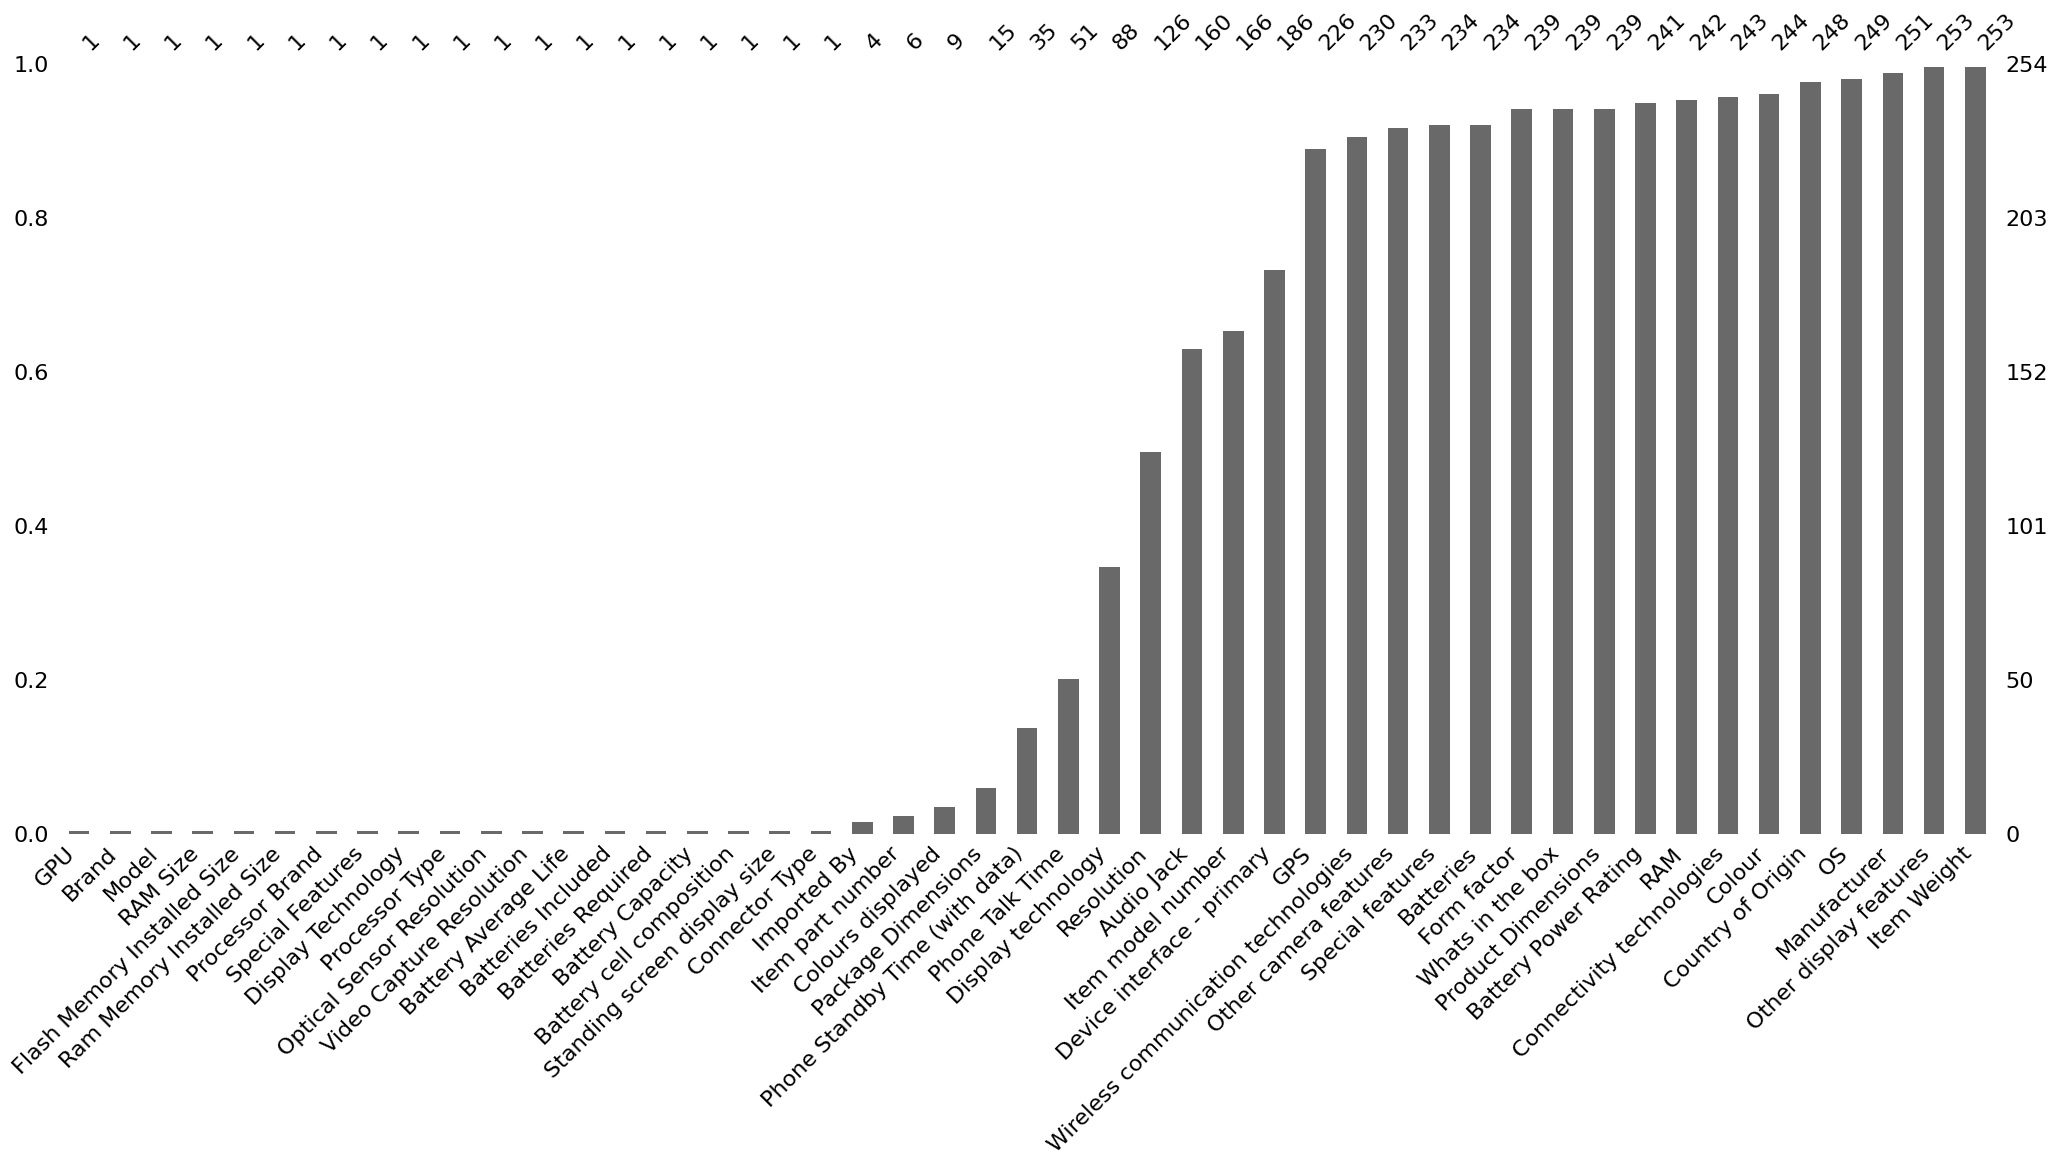

In [5]:
missingno.bar(df, sort="ascending")

<Axes: >

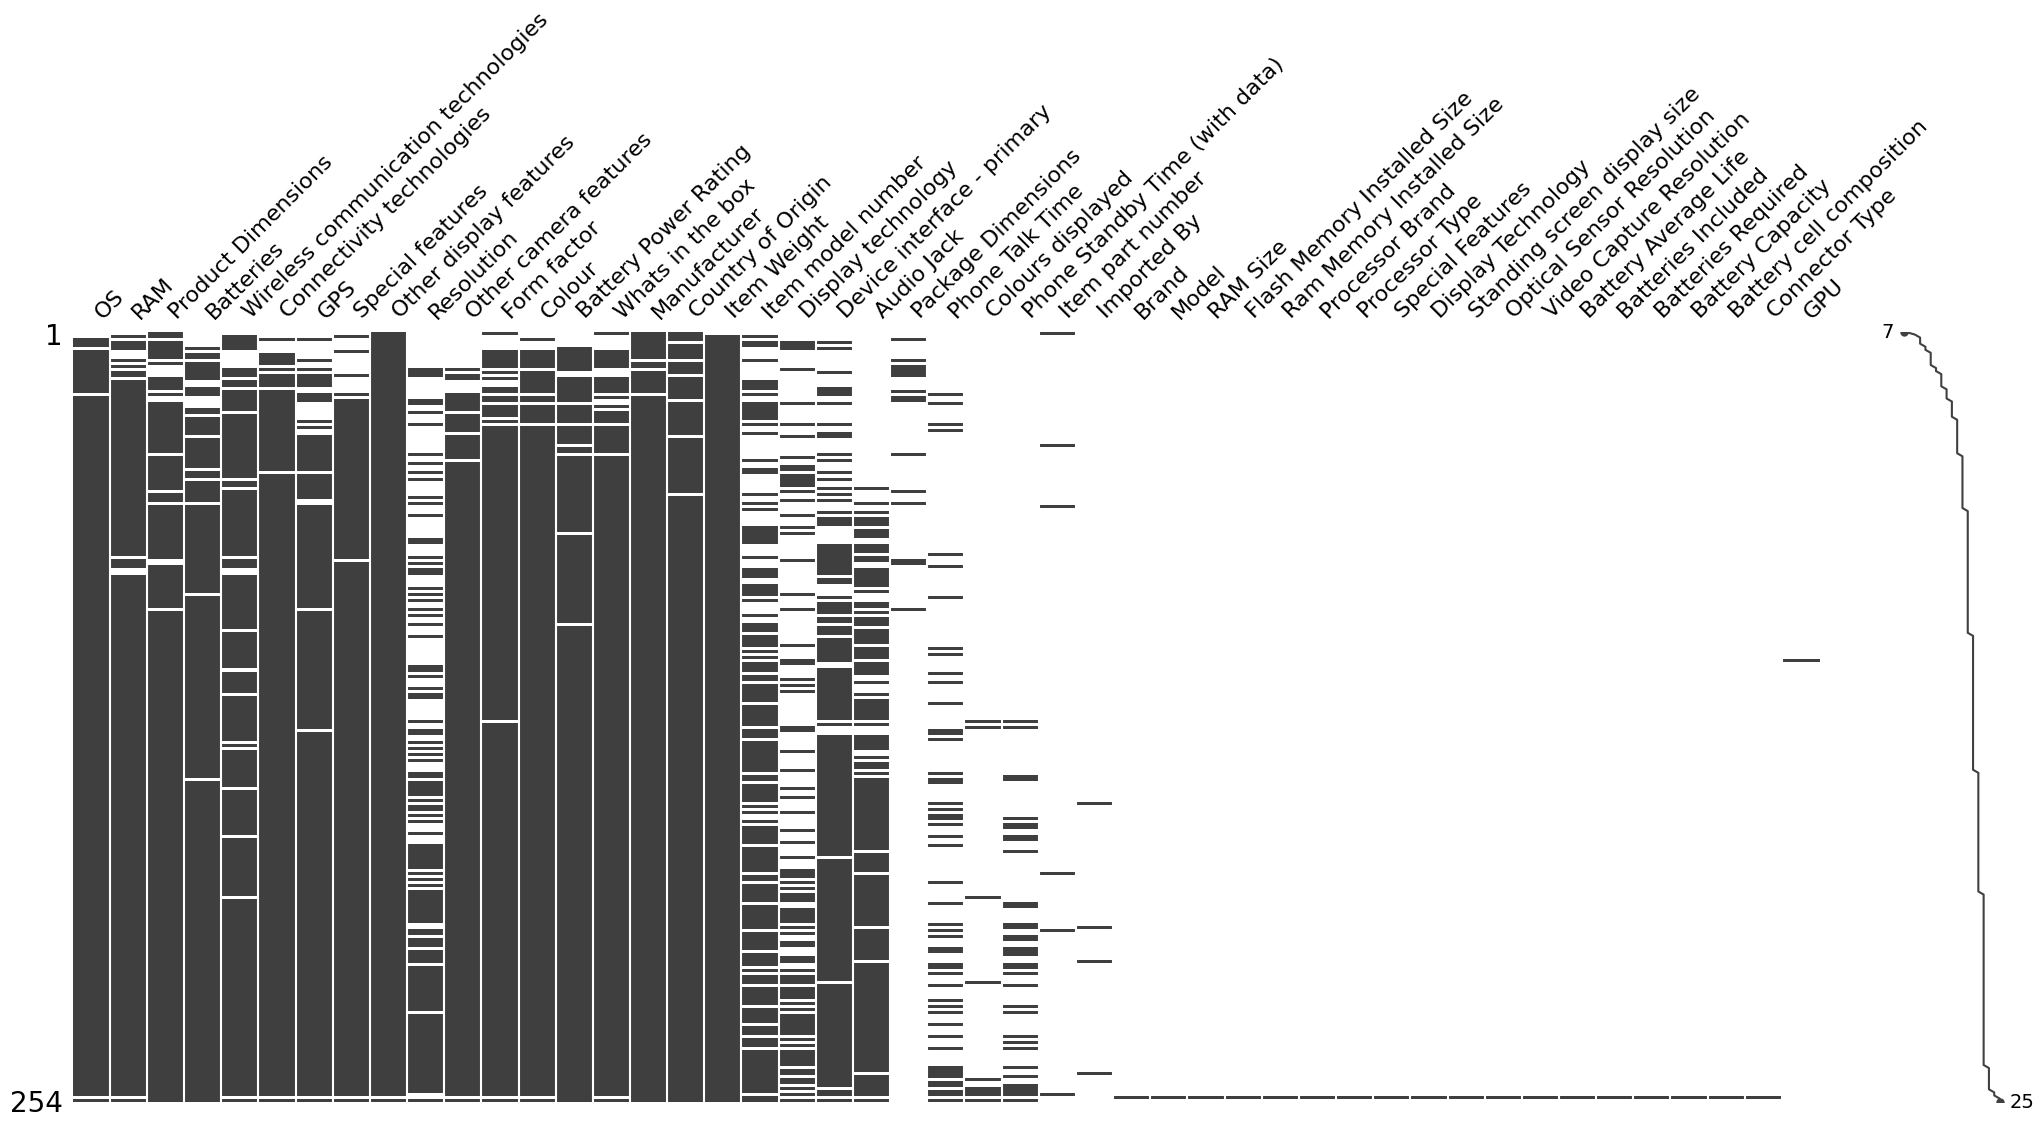

In [6]:
missingno.matrix(df, sort="ascending")

In [11]:
df.dropna(axis=1, thresh=75, ignore_index=True, inplace=True)
df

,OS,RAM,Product Dimensions,Batteries,Wireless communication technologies,Connectivity technologies,GPS,Special features,Other display features,Resolution,...,Colour,Battery Power Rating,Whats in the box,Manufacturer,Country of Origin,Item Weight,Item model number,Display technology,Device interface - primary,Audio Jack
0,FunTouch OS 12,4 GB,16.4 x 7.6 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,Orange Shimmer,5000,"Model Y56 5G Documentation, USB cable, USB Pow...",vivo Mobile India Pvt Ltd,India,181 g,NaN,NaN,NaN,NaN
1,Android,8 GB,16 x 0.8 x 7.5 cm; 430 Grams,NaN,Cellular,Wi-Fi,GLONASS,"RGB Light sensor, Dual SIM, Fingerprint sensor...",Wireless,1080 x 2400,...,Navy,4500,"Handset, Non-removable Battery Included, Earph...",Samsung,India,430 g,SM-G780FZGNINS-cr,AMOLED,NaN,NaN
2,Android 13.0,8 GB,16.87 x 7.67 x 0.9 cm; 203 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,"Fast Charging Support, Dual SIM, Expandable Me...",Wireless,2460 x 1080,...,Radiant Pearl,5000 Milliamp Hours,"Power Adapter, SIM Tray Ejector, Phone Case, U...",Lava,India,203 g,LXX506,FHD+,Touchscreen,3.5 mm
3,Android 11.0,4 GB,16.5 x 7.6 x 0.9 cm; 194 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,50 MP AI Triple Camera | 6.6 inch FHD+ display...,Wireless,NaN,...,Speed Black,5000,"Handset, SIM Tray Ejector, Adapter, Phone Case...",OPPO Mobiles India Pvt Ltd,India,194 g,RMX3286,NaN,Touchscreen,NaN
4,Android 12.0,128 GB,16.4 x 7.5 x 0.9 cm; 195 Grams,1 Lithium Polymer batteries required. (included),Cellular,"Bluetooth, USB, 2.4G, 5G",AGPS,"Fingerprint Scanner, Rear Camera, Primary Came...",Wireless,720p,...,Magic Skin Blue,5000,"Smartphone,10W Power Adaptor, Type-C Cable,TPU...",G mobiles,India,195 g,KI5K (8+128),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Android 10.0,8 GB,10 x 12 x 13 cm; 465 Grams,NaN,Cellular,Wi-Fi,NaN,"Front Camera, Camera",Wireless,NaN,...,RED,5000 Milliamp Hours,"SIM Tray Ejector, Adapter, Phone Case, USB Cable","vivo Mobile India Private Limited, vivo Mobile...",India,465 g,"(ARTISTIC RED,128) (8 GB RAM)",NaN,NaN,NaN
227,Android,2 GB,7.2 x 14.2 x 0.9 cm; 149 Grams,1 Lithium Ion batteries required. (included),"Bluetooth, Wi-Fi","GSM, 4G LTE, (850/900/1800/1900 MHz), (2300/21...",AGPS,"Dual SIM, E-mail, Accelerometer, GPS, FM Radio...",Wireless,720 x 1280,...,Gold,2600,"Handset, Travel Adaptor, USB Cable and User Guide",Samsung,India,149 g,G-550FY,NaN,Touchscreen,NaN
228,FunTouch OS 13,6 GB,15.9 x 7.4 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,Garden Green,5000,"Model Y27 Documentation, USB cable, USB Power ...",vivo,India,181 g,NaN,NaN,NaN,NaN
229,OxygenOS,8 GB,7.6 x 0.8 x 16.6 cm; 195 Grams,1 Lithium Polymer batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Rear Camera, Camera",Wireless,NaN,...,Pastel Lime,5000,"SIM Tray Ejector, Adapter, Phone Case, USB Cable",Oppo Mobiles India Private Limited,India,195 g,NaN,AMOLED,Keyboard,NaN


In [12]:
df.dropna(axis=0, thresh=15, ignore_index=True, inplace=True)
df

,OS,RAM,Product Dimensions,Batteries,Wireless communication technologies,Connectivity technologies,GPS,Special features,Other display features,Resolution,...,Colour,Battery Power Rating,Whats in the box,Manufacturer,Country of Origin,Item Weight,Item model number,Display technology,Device interface - primary,Audio Jack
0,FunTouch OS 12,4 GB,16.4 x 7.6 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,Orange Shimmer,5000,"Model Y56 5G Documentation, USB cable, USB Pow...",vivo Mobile India Pvt Ltd,India,181 g,NaN,NaN,NaN,NaN
1,Android,8 GB,16 x 0.8 x 7.5 cm; 430 Grams,NaN,Cellular,Wi-Fi,GLONASS,"RGB Light sensor, Dual SIM, Fingerprint sensor...",Wireless,1080 x 2400,...,Navy,4500,"Handset, Non-removable Battery Included, Earph...",Samsung,India,430 g,SM-G780FZGNINS-cr,AMOLED,NaN,NaN
2,Android 13.0,8 GB,16.87 x 7.67 x 0.9 cm; 203 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,"Fast Charging Support, Dual SIM, Expandable Me...",Wireless,2460 x 1080,...,Radiant Pearl,5000 Milliamp Hours,"Power Adapter, SIM Tray Ejector, Phone Case, U...",Lava,India,203 g,LXX506,FHD+,Touchscreen,3.5 mm
3,Android 11.0,4 GB,16.5 x 7.6 x 0.9 cm; 194 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",True,50 MP AI Triple Camera | 6.6 inch FHD+ display...,Wireless,NaN,...,Speed Black,5000,"Handset, SIM Tray Ejector, Adapter, Phone Case...",OPPO Mobiles India Pvt Ltd,India,194 g,RMX3286,NaN,Touchscreen,NaN
4,Android 12.0,128 GB,16.4 x 7.5 x 0.9 cm; 195 Grams,1 Lithium Polymer batteries required. (included),Cellular,"Bluetooth, USB, 2.4G, 5G",AGPS,"Fingerprint Scanner, Rear Camera, Primary Came...",Wireless,720p,...,Magic Skin Blue,5000,"Smartphone,10W Power Adaptor, Type-C Cable,TPU...",G mobiles,India,195 g,KI5K (8+128),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Android 10.0,8 GB,10 x 12 x 13 cm; 465 Grams,NaN,Cellular,Wi-Fi,NaN,"Front Camera, Camera",Wireless,NaN,...,RED,5000 Milliamp Hours,"SIM Tray Ejector, Adapter, Phone Case, USB Cable","vivo Mobile India Private Limited, vivo Mobile...",India,465 g,"(ARTISTIC RED,128) (8 GB RAM)",NaN,NaN,NaN
226,Android,2 GB,7.2 x 14.2 x 0.9 cm; 149 Grams,1 Lithium Ion batteries required. (included),"Bluetooth, Wi-Fi","GSM, 4G LTE, (850/900/1800/1900 MHz), (2300/21...",AGPS,"Dual SIM, E-mail, Accelerometer, GPS, FM Radio...",Wireless,720 x 1280,...,Gold,2600,"Handset, Travel Adaptor, USB Cable and User Guide",Samsung,India,149 g,G-550FY,NaN,Touchscreen,NaN
227,FunTouch OS 13,6 GB,15.9 x 7.4 x 0.8 cm; 181 Grams,1 Lithium Ion batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Bluetooth Enabled, Basic Phone, Dual Camera, C...",Wireless,1080p,...,Garden Green,5000,"Model Y27 Documentation, USB cable, USB Power ...",vivo,India,181 g,NaN,NaN,NaN,NaN
228,OxygenOS,8 GB,7.6 x 0.8 x 16.6 cm; 195 Grams,1 Lithium Polymer batteries required. (included),Cellular,"Bluetooth, Wi-Fi, USB",GLONASS,"Rear Camera, Camera",Wireless,NaN,...,Pastel Lime,5000,"SIM Tray Ejector, Adapter, Phone Case, USB Cable",Oppo Mobiles India Private Limited,India,195 g,NaN,AMOLED,Keyboard,NaN


<Axes: >

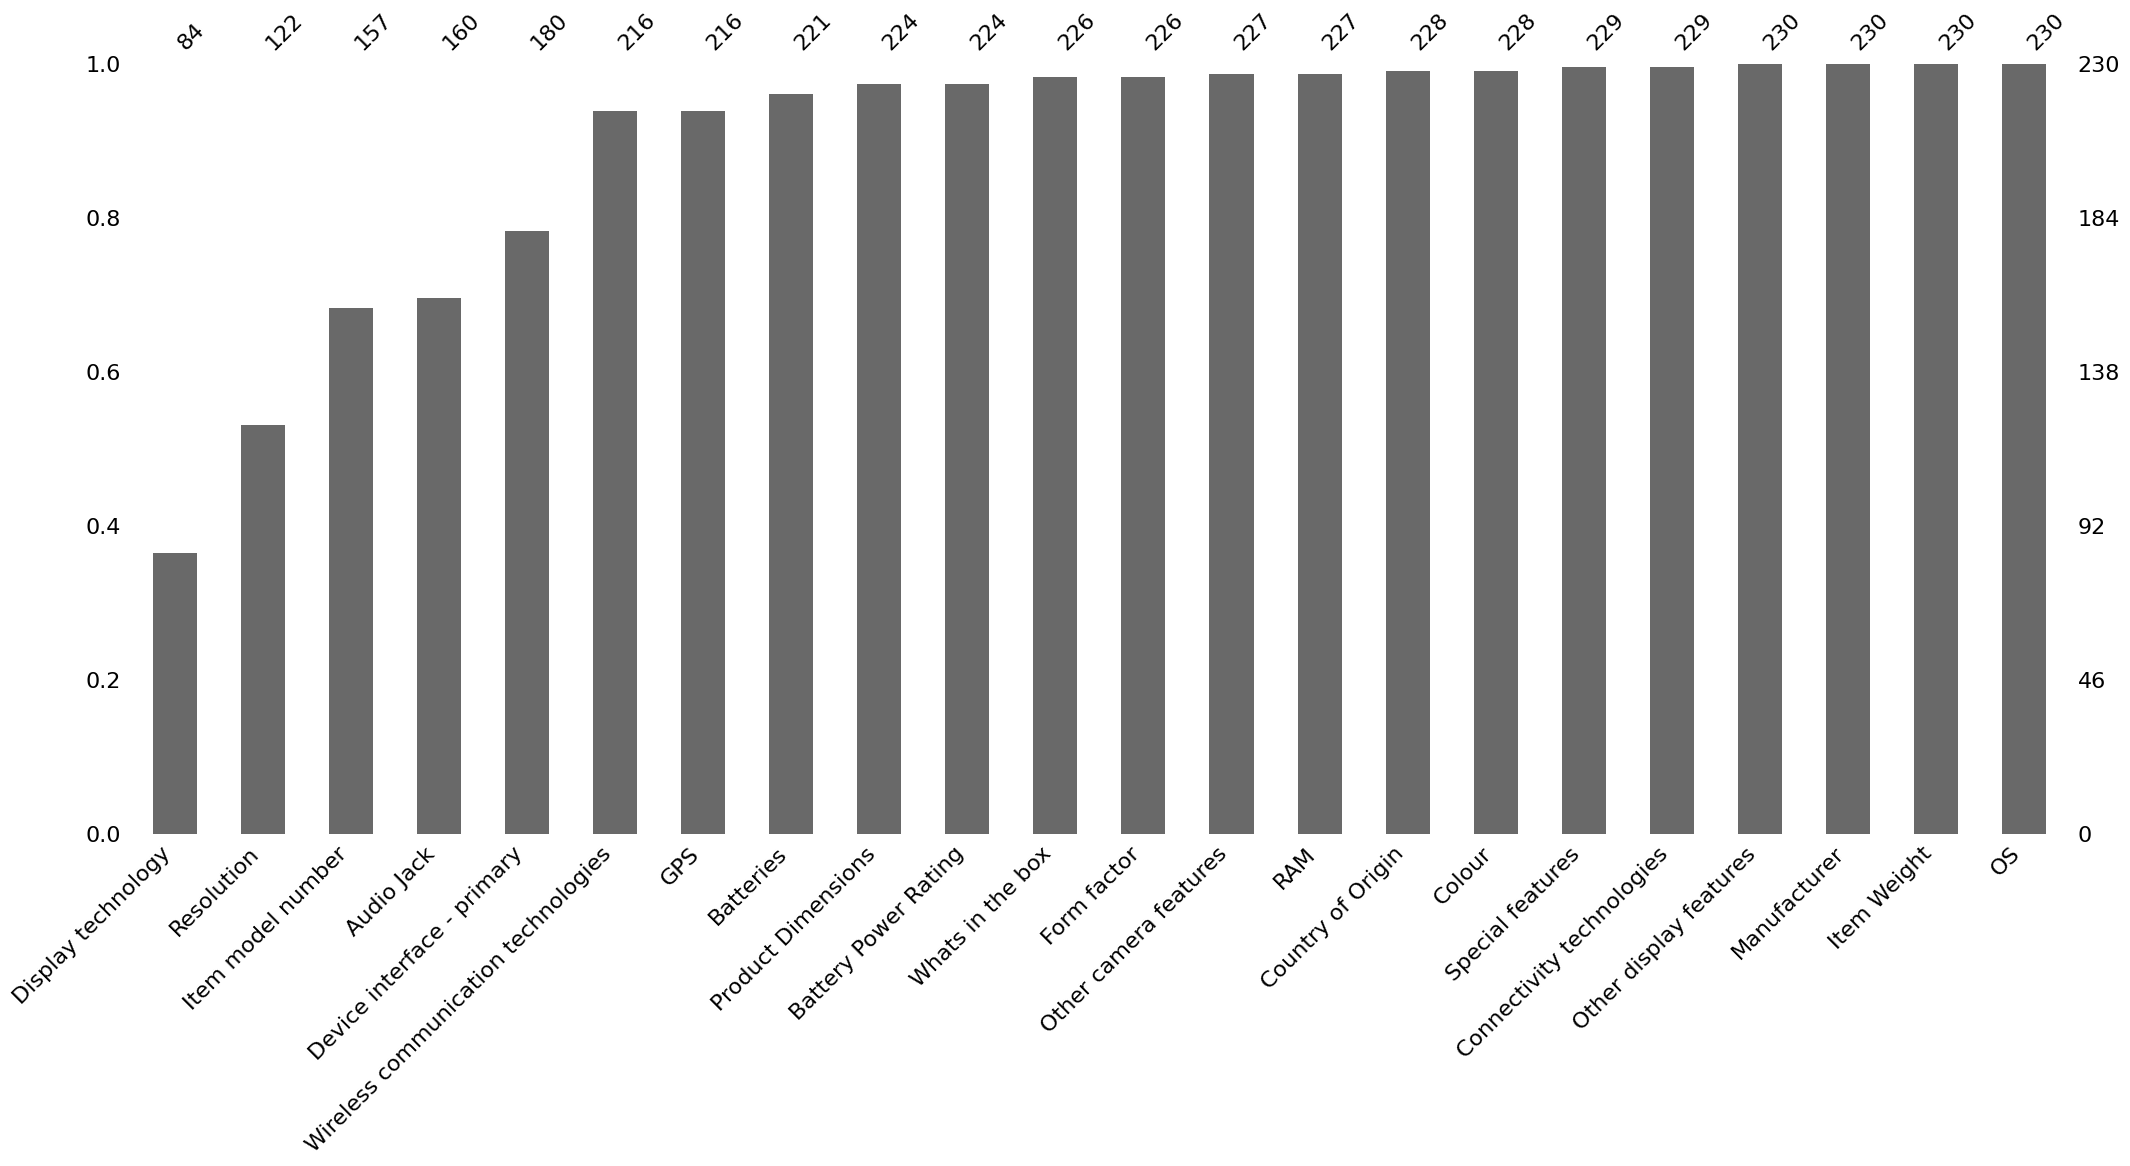

In [13]:
missingno.bar(df, sort="ascending")

<Axes: >

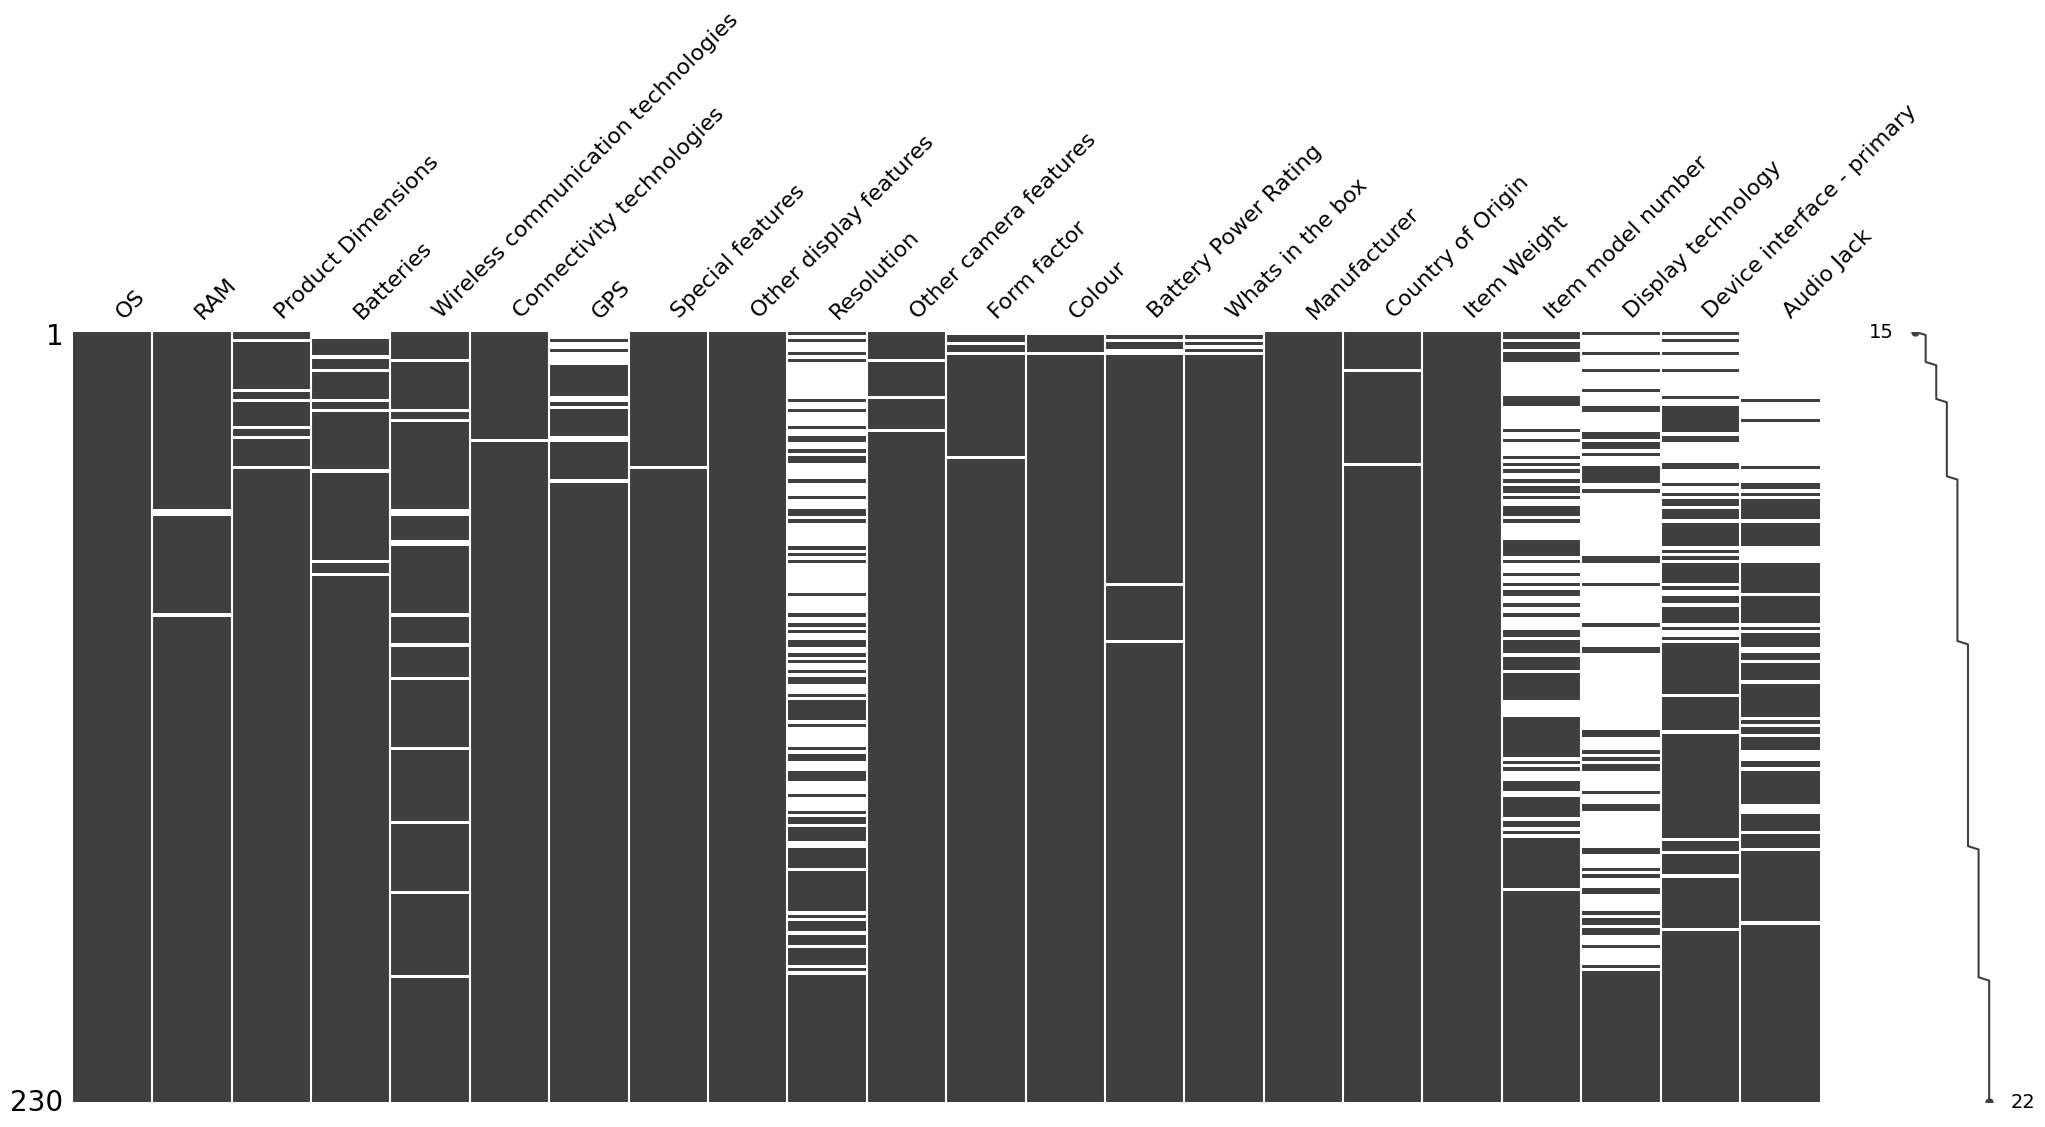

In [14]:
missingno.matrix(df, sort="ascending")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   OS                                   230 non-null    object
 1   RAM                                  227 non-null    object
 2   Product Dimensions                   224 non-null    object
 3   Batteries                            221 non-null    object
 4   Wireless communication technologies  216 non-null    object
 5   Connectivity technologies            229 non-null    object
 6   GPS                                  216 non-null    object
 7   Special features                     229 non-null    object
 8   Other display features               230 non-null    object
 9   Resolution                           122 non-null    object
 10  Other camera features                227 non-null    object
 11  Form factor                          226 non-

In [19]:
round(df.count().sort_values(ascending=False)/len(df)*100,4)

OS                                     100.0000
Item Weight                            100.0000
Manufacturer                           100.0000
Other display features                 100.0000
Connectivity technologies               99.5652
Special features                        99.5652
Country of Origin                       99.1304
Colour                                  99.1304
RAM                                     98.6957
Other camera features                   98.6957
Whats in the box                        98.2609
Form factor                             98.2609
Battery Power Rating                    97.3913
Product Dimensions                      97.3913
Batteries                               96.0870
GPS                                     93.9130
Wireless communication technologies     93.9130
Device interface - primary              78.2609
Audio Jack                              69.5652
Item model number                       68.2609
Resolution                              